# Taller 2
- Alumno: José Nicolas Castillo Rojas

In [43]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Paso 1 
Utilice la imagen de soldadura que se encuentra en la intranet (adjunta con la tarea)

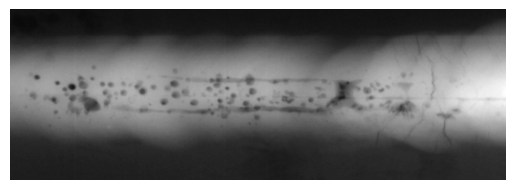

(333, 968)


In [44]:
img =cv2.imread('fallas.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap="gray"), plt.axis('off')
plt.show()
print(img.shape)

### Extra 
cuando mire la imagen sin aplicar [cv2.IMREAD_GRAYSCALE], la imagen presentaba 3 capas por lo que me dio curisos hacer los pasos de la tarea pero comparando los resultado de cada capa y tambien copararlo con el resultado leyendo la imagen con [cv2.IMREAD_GRAYSCALE], el cual es solo 1 capa, Por lo que no considerar para la tarea 2 el archivo Extras.ipynb


## Paso 2
Genere una nueva imagen ecualizada y comente los resultados respecto a la imagen original.

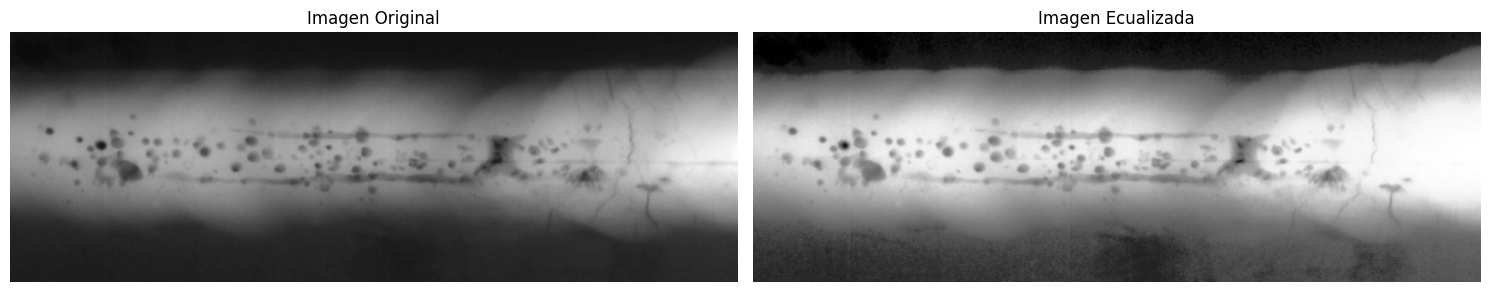

In [45]:
img_ecualizada = cv2.equalizeHist(img)

plt.figure(figsize=(15, 10))
# Mostrar la imagen original
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen ecualizada
plt.subplot(1, 2, 2)
plt.imshow(img_ecualizada, cmap='gray')
plt.title('Imagen Ecualizada')
plt.axis('off')

# Mostrar el multiplot
plt.tight_layout()
plt.show()

### Comente
En este caso se ve como la imagen tiene un aumento en el contraste, genernado que la diferancia entre los objetos sean más claras al momento de procesarlas,dado que se destaca más los bordes de la opjetos , permitiendo distingirlos de mejor manera.

## Paso 2
Genere una imagen libre de ruido1 empleando el filtro de la mediana con la imagen obtenida en 
paso-2. Busque un valor óptimo que atenúe completamente las fallas empleando el filtro de la 
mediana. Una vez definido un determinado valor, utilícelo en los siguientes pasos (Importante: el 
tamaño de máscara debe ser impar, ver Hint)

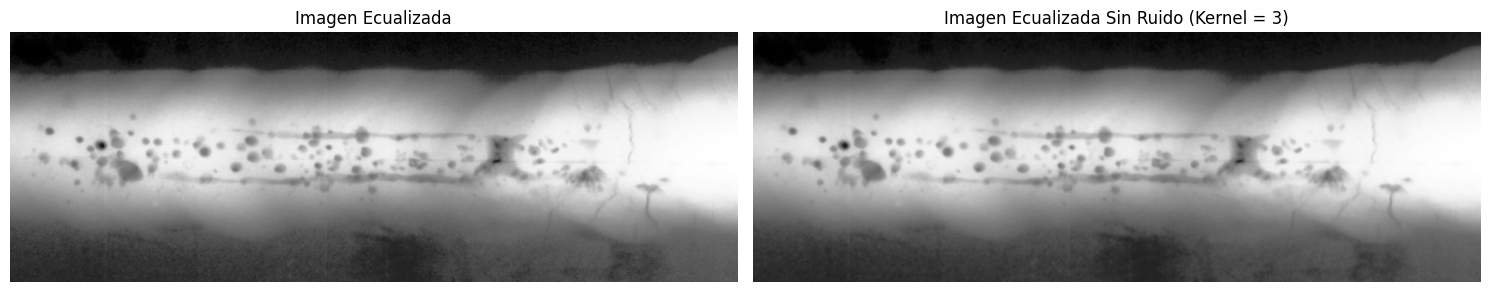

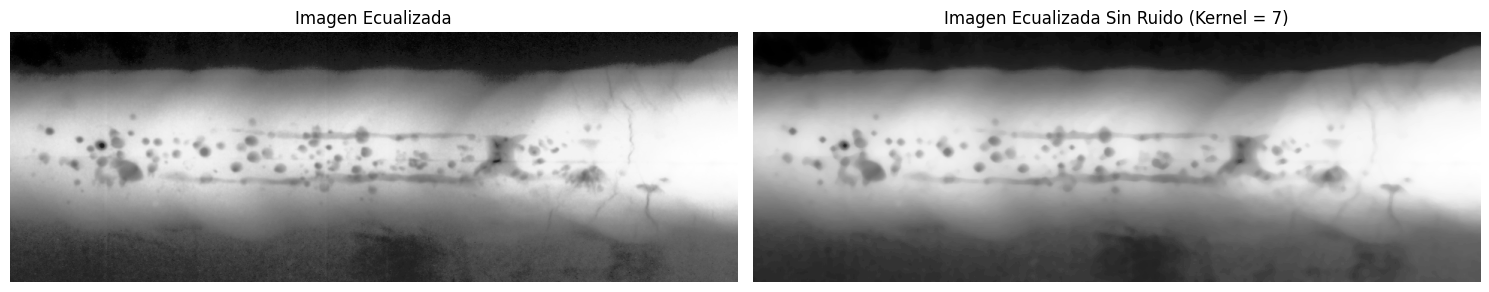

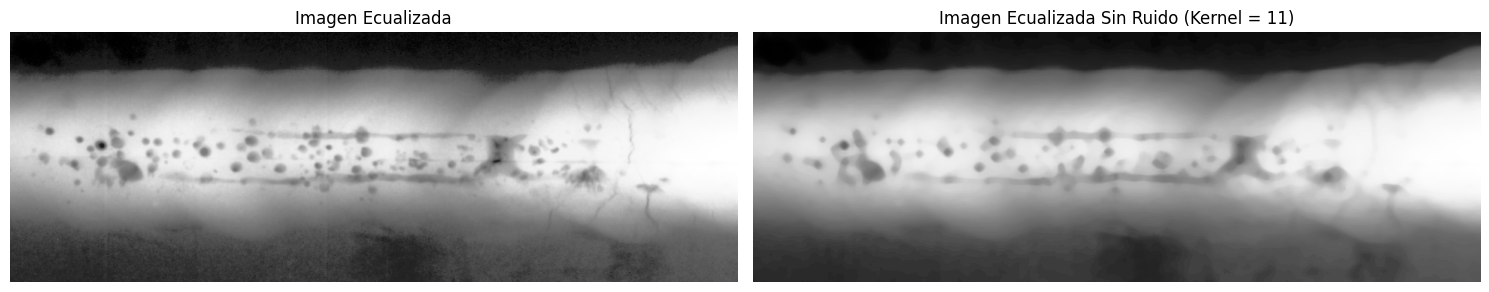

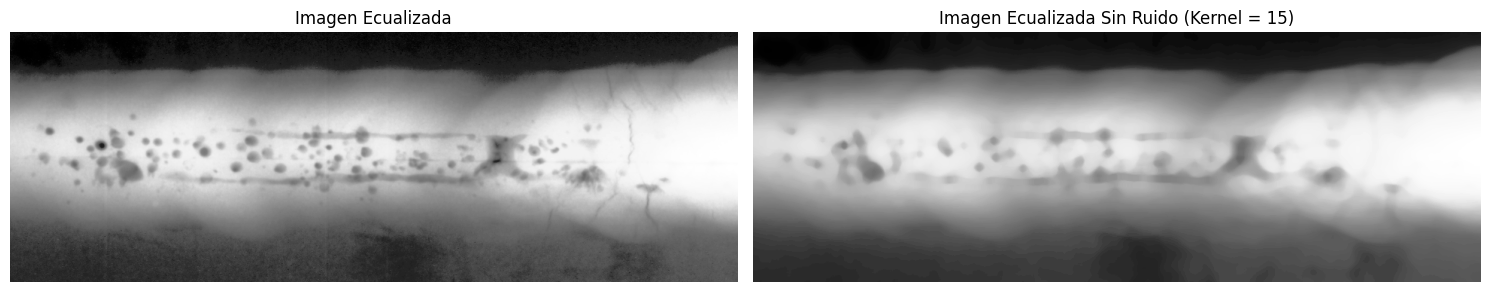

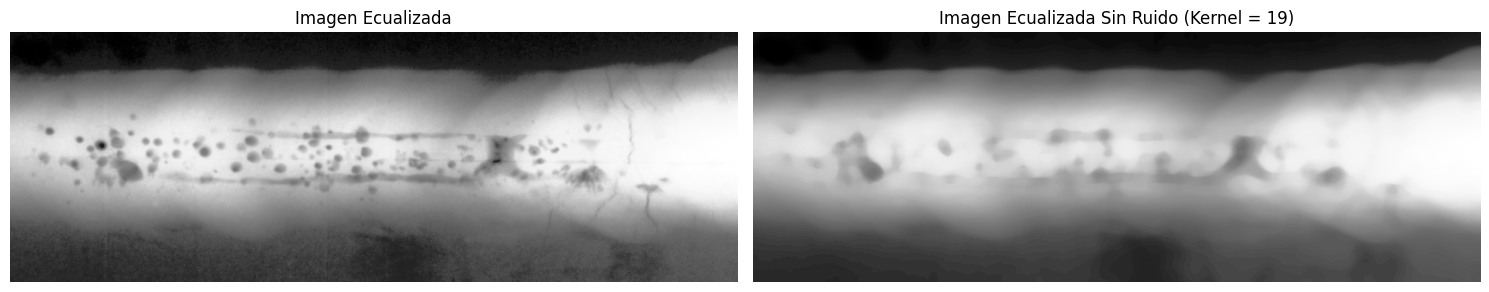

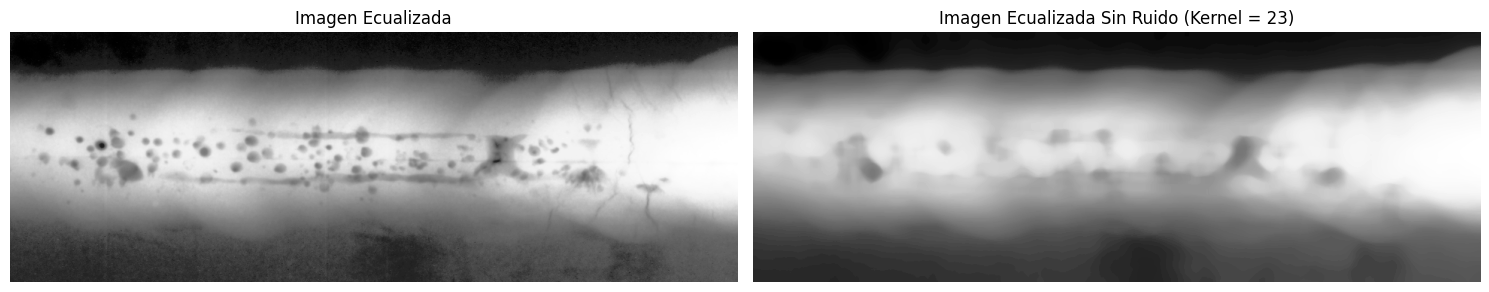

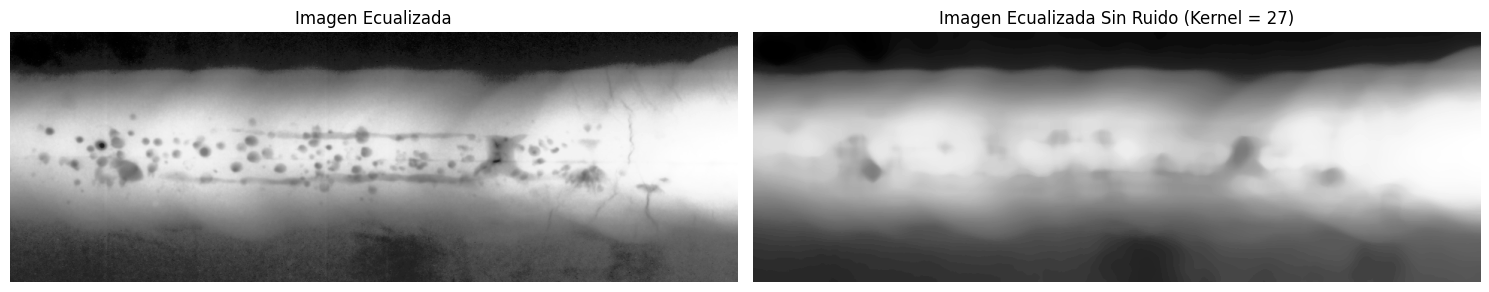

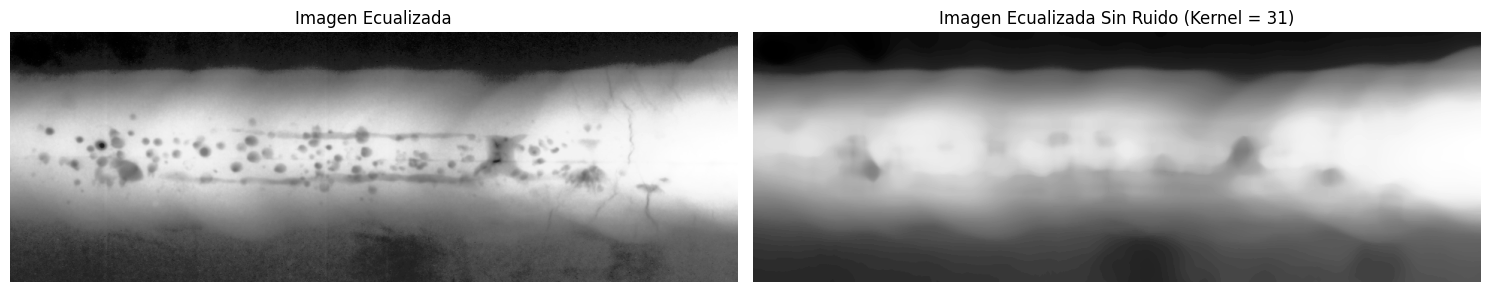

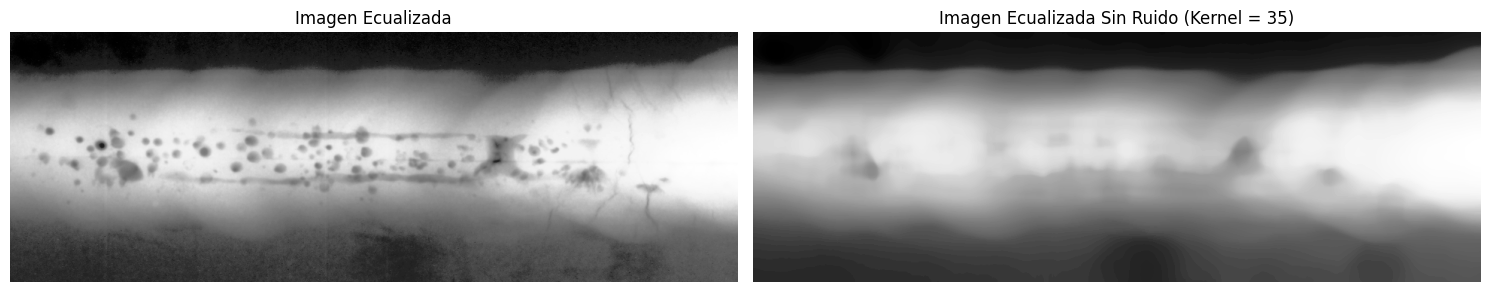

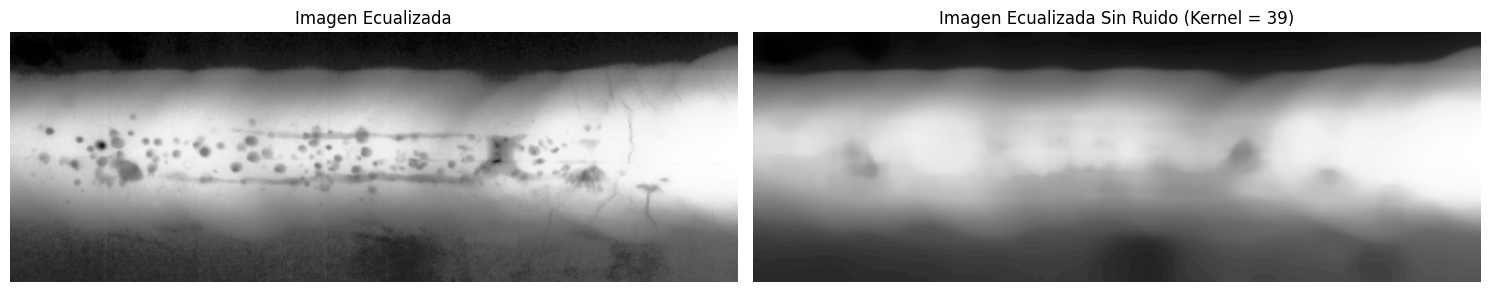

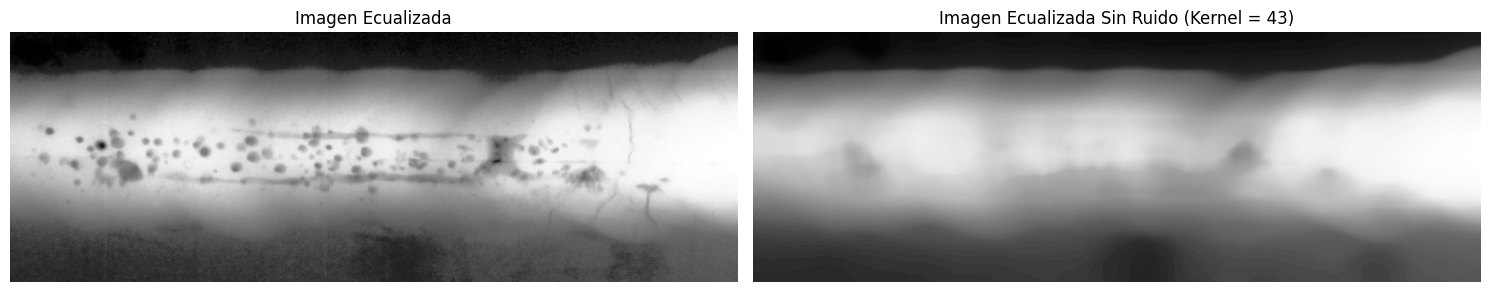

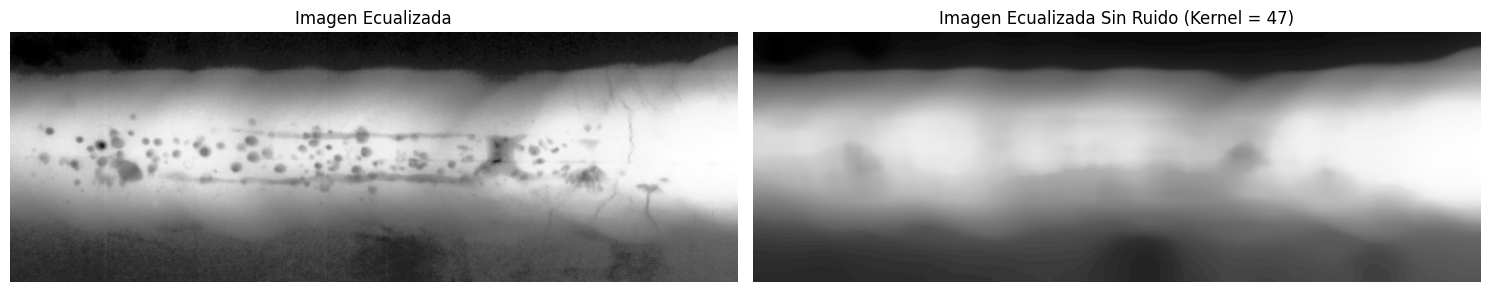

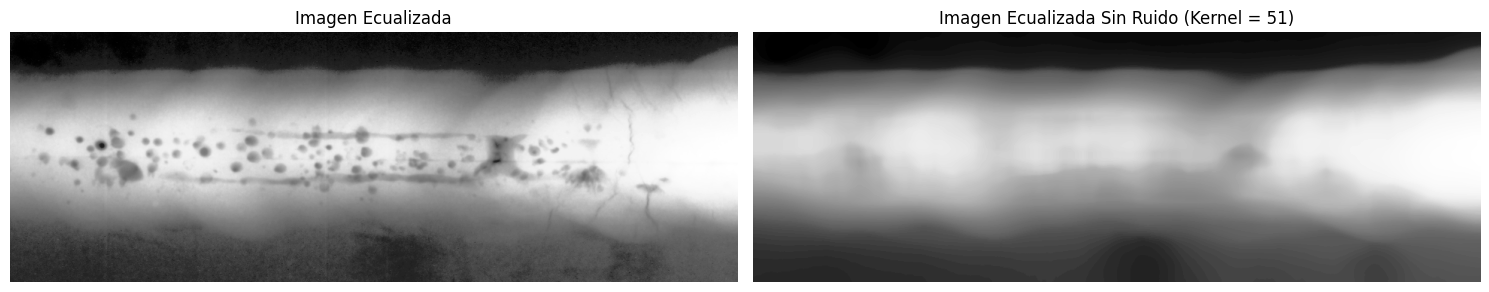

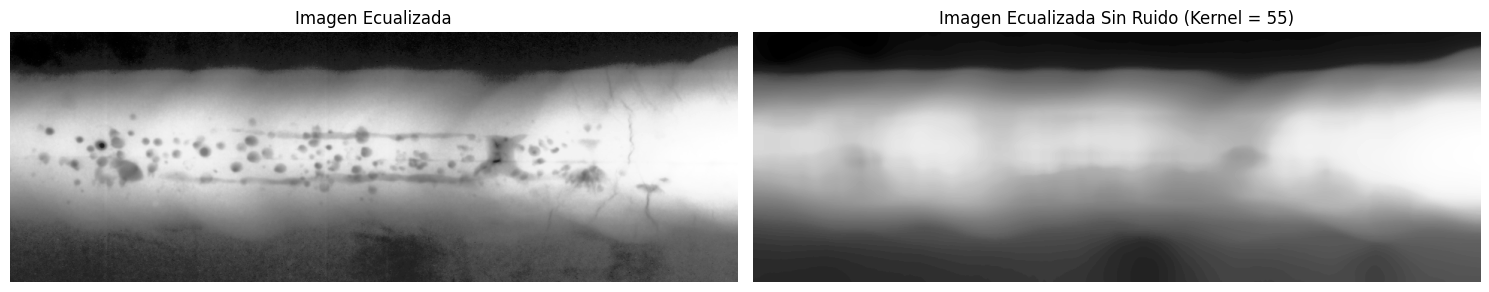

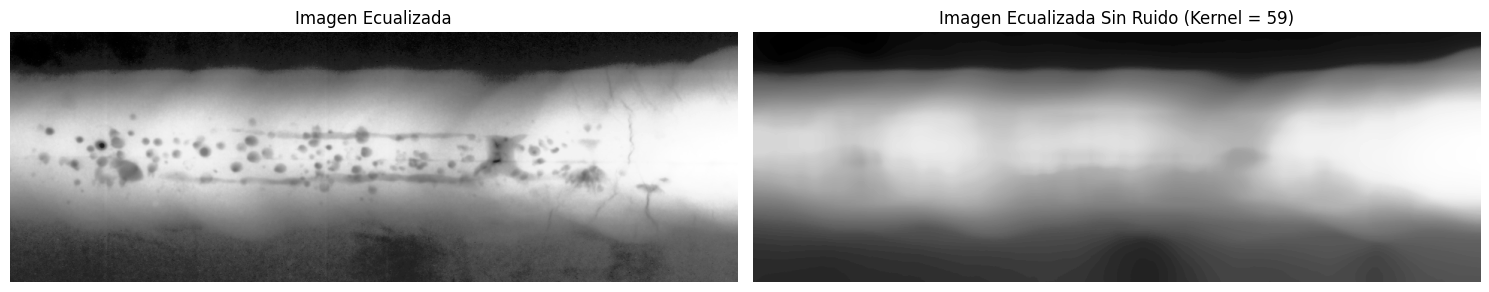

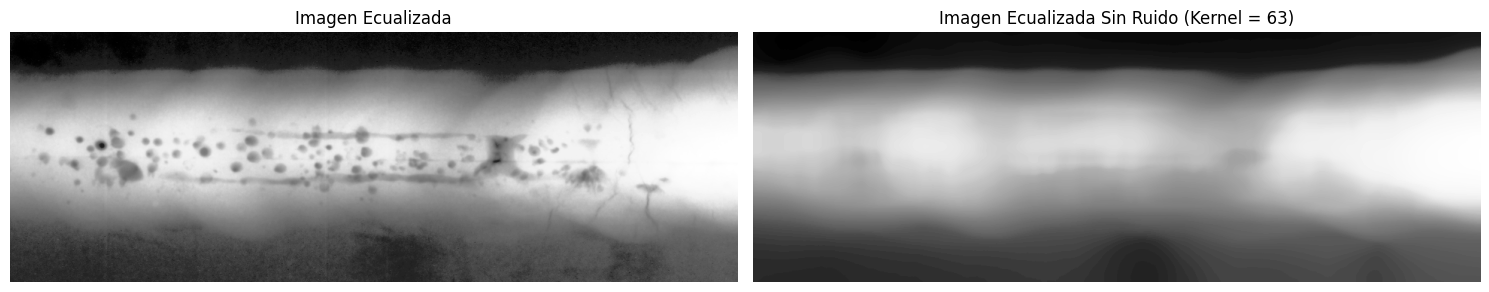

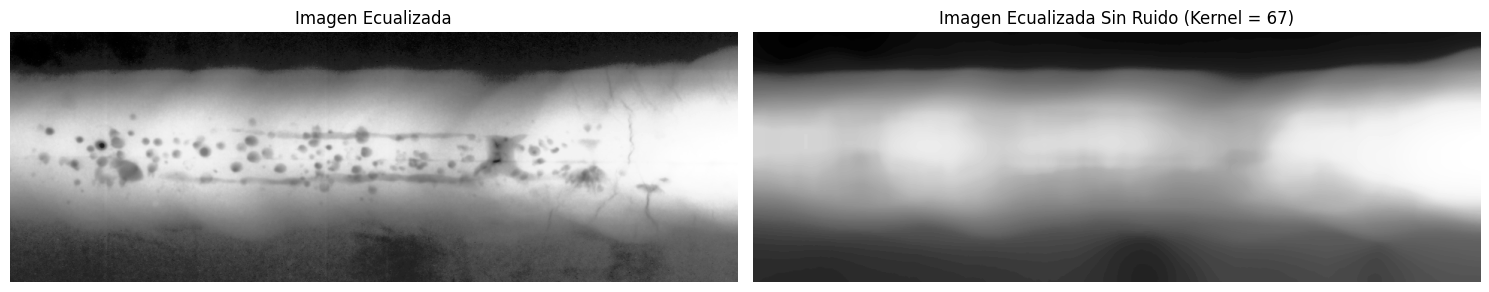

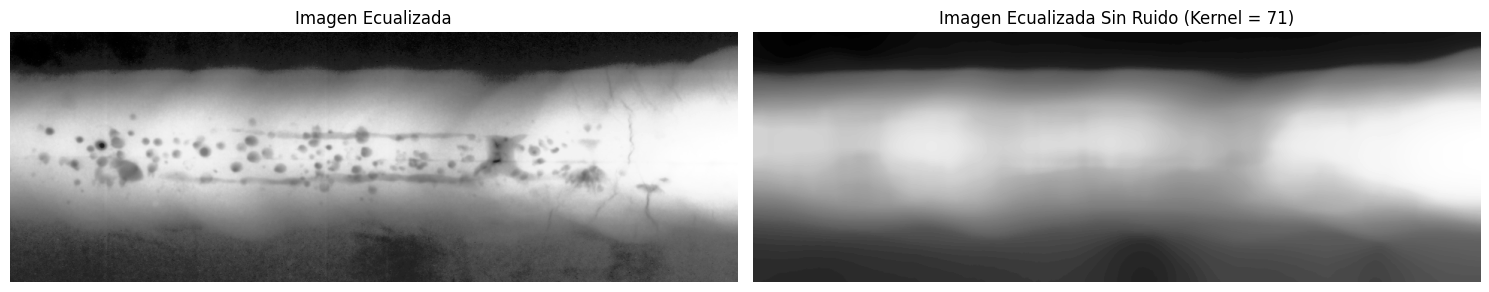

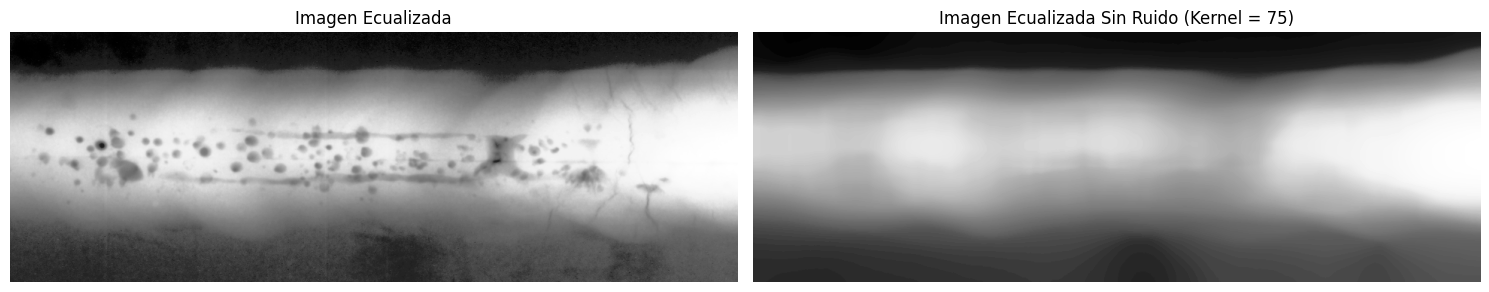

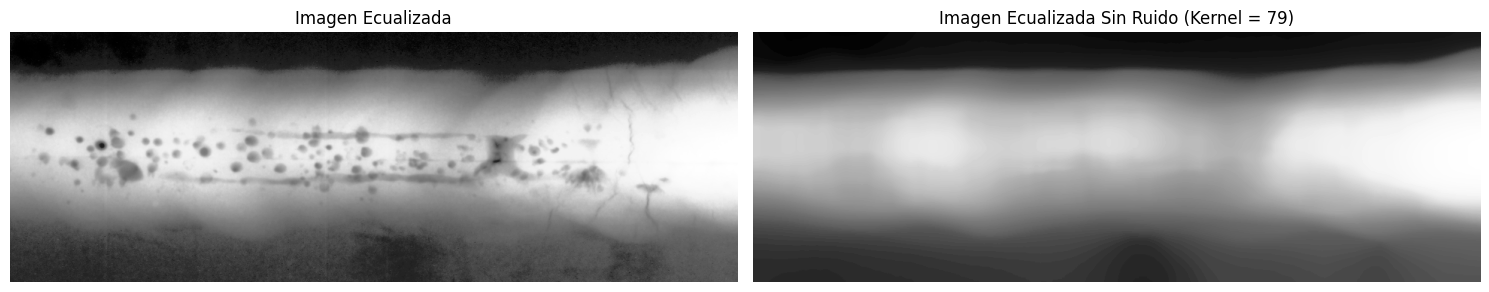

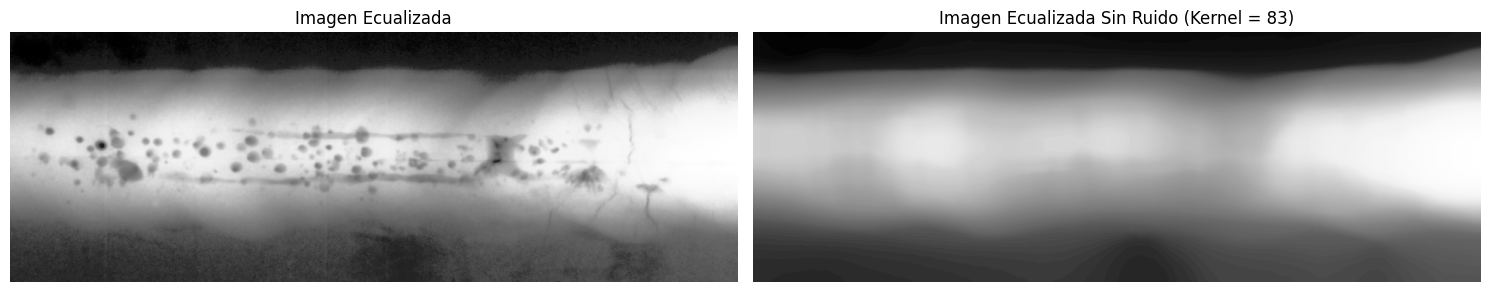

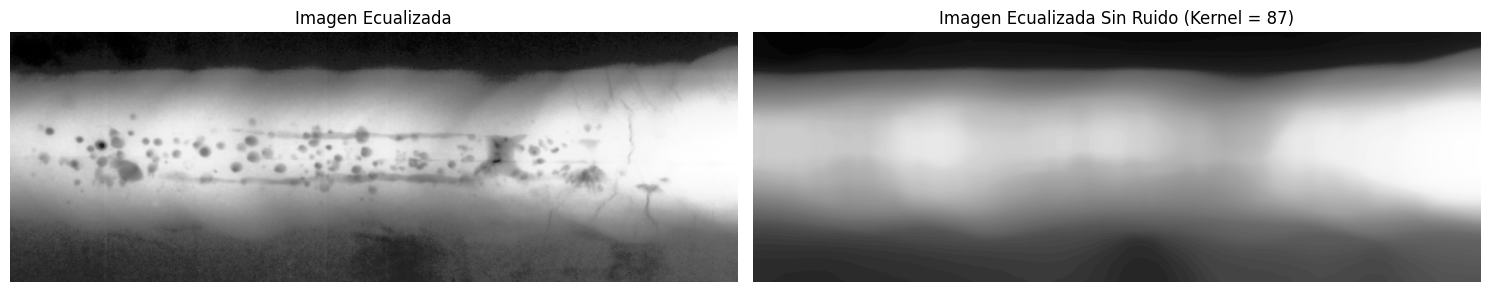

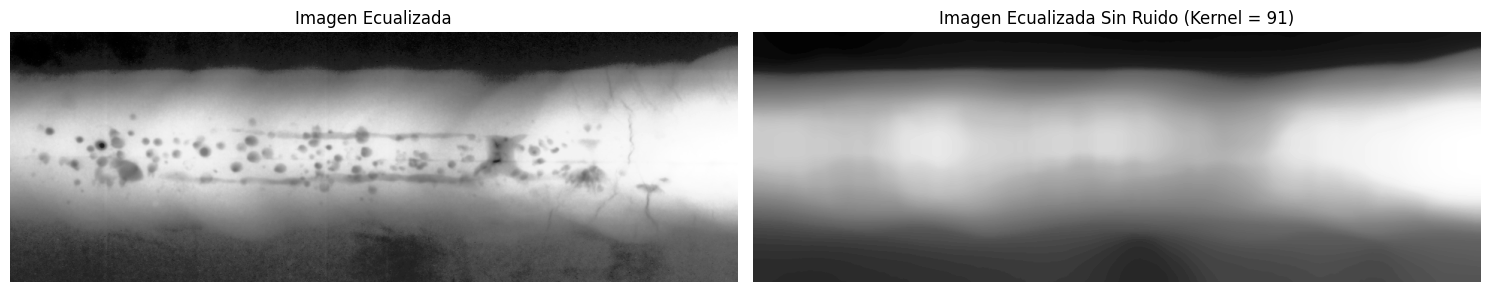

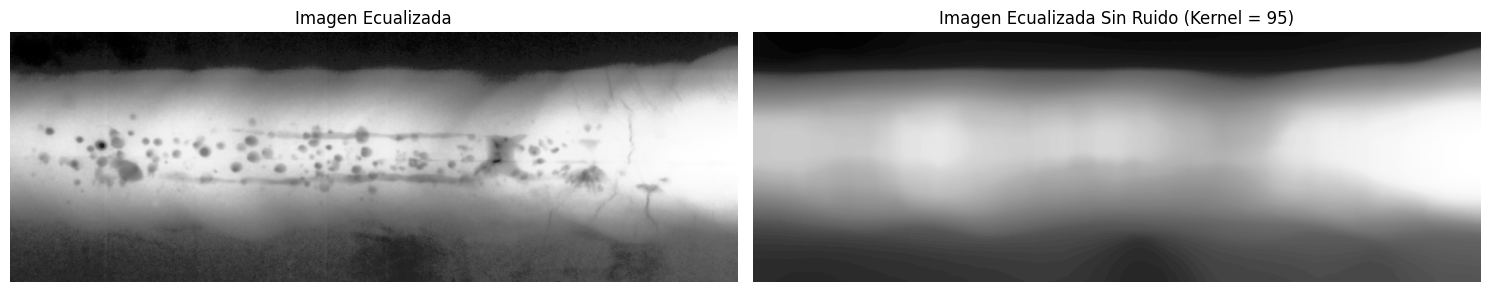

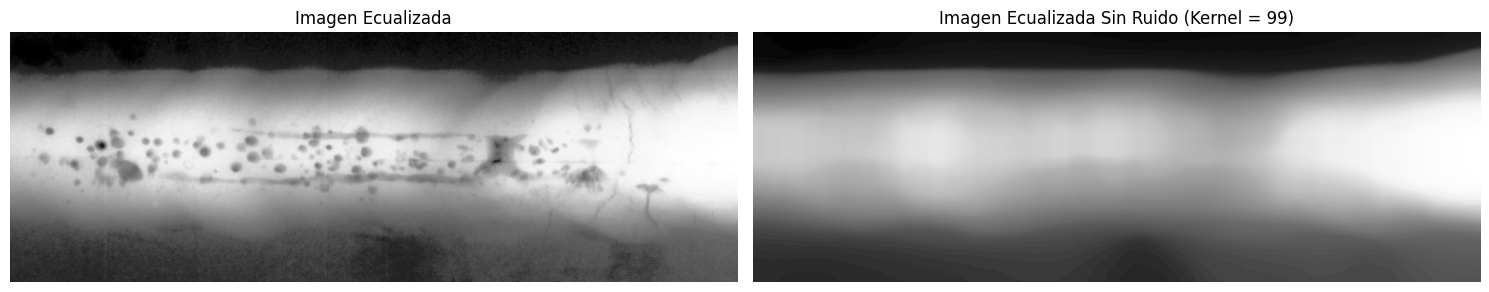

In [46]:
# Definir los tamaños de kernel (tamaño de máscara)
TamanoKernel = list(range(3, 101, 4))
# Ajustar para que todos los tamaños de kernel sean impares
TamanoKernel = [x if x % 2 != 0 else x + 1 for x in TamanoKernel]

for Kernel in TamanoKernel:
    # Aplicar filtro de mediana para eliminar el ruido
    img_sin_ruido = cv2.medianBlur(img_ecualizada, Kernel)

    plt.figure(figsize=(15, 10))
    # Mostrar la imagen original
    plt.subplot(1, 2, 1)
    plt.imshow(img_ecualizada, cmap='gray')
    plt.title('Imagen Ecualizada')
    plt.axis('off')

    # Mostrar la imagen ecualizada
    plt.subplot(1, 2, 2)
    plt.imshow(img_sin_ruido, cmap='gray')
    plt.title('Imagen Ecualizada Sin Ruido (Kernel = {})'.format(Kernel))  # Corregir 'kernel' a 'Kernel'
    plt.axis('off')

    # Mostrar el multiplot
    plt.tight_layout()
    plt.show()



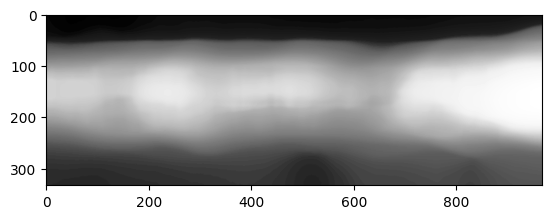

In [47]:
#Guardar la imagen sin ruido
# Luego de ver que desde un kernel de tamaño 71 la imagen no presenta ruido
img_sin_ruido = cv2.medianBlur(img_ecualizada, 71)
cv2.imwrite('imagen_sin_ruido.jpg', img_sin_ruido)

plt.imshow(img_sin_ruido, cmap='gray')

## Paso 4
Reste la imagen del paso-3 con la del paso-2 y despliegue el resultado por el browser (en colab). 
Analice  en  qué  casos  las  fallas  son  más  visibles  según  el  parámetro  del  paso-3  y  comente  sus 
resultados. Solo las fallas debieran ser visibles como resultado de este paso. 

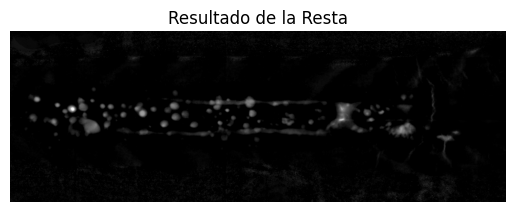

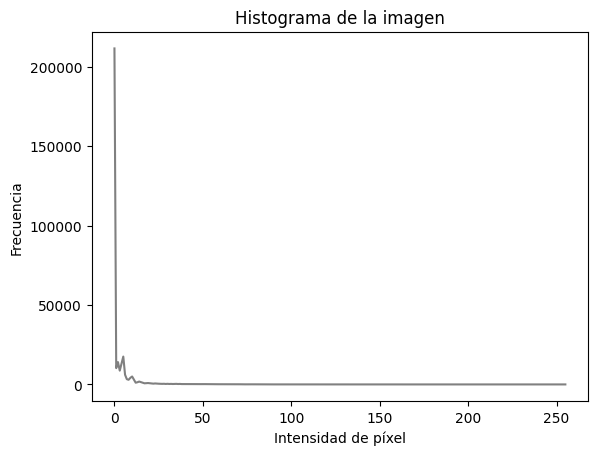

In [48]:
# Restar la imagen del paso 3 con la del paso 2
img_resultado = cv2.subtract(img_sin_ruido,img_ecualizada)

# Visualizar el resultado
plt.imshow(img_resultado, cmap='gray')
plt.title('Resultado de la Resta')
plt.axis('off')
plt.show()

# Calcular el histograma
histograma = cv2.calcHist([img_resultado ], [0], None, [256], [0, 256])

# Mostrar el histograma
plt.plot(histograma, color='gray')
plt.xlabel('Intensidad de píxel')
plt.ylabel('Frecuencia')
plt.title('Histograma de la imagen')
plt.show()


# Paso 5 
Binarice  la  imagen  del  paso  4  empleando  una  operación  lógica  según  un  umbral  que  usted 
defina. El objetivo de la binarización es que las fallas queden reflejadas en color blanco (valor 1) , 
y el fondo en color negro (valor 0). 

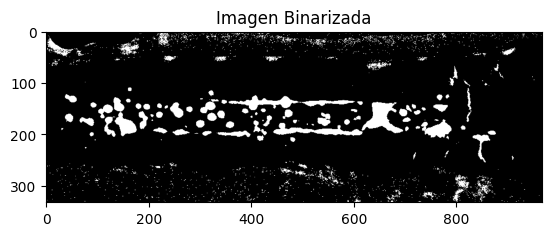

In [49]:
umbral = 10  # Se defina el umbral en base al histograma
_, img_binarizada = cv2.threshold(img_resultado, umbral, 255, cv2.THRESH_BINARY)
# Mostrar el histograma
plt.imshow(img_binarizada, cmap='gray')
plt.title('Imagen Binarizada')
plt.show()


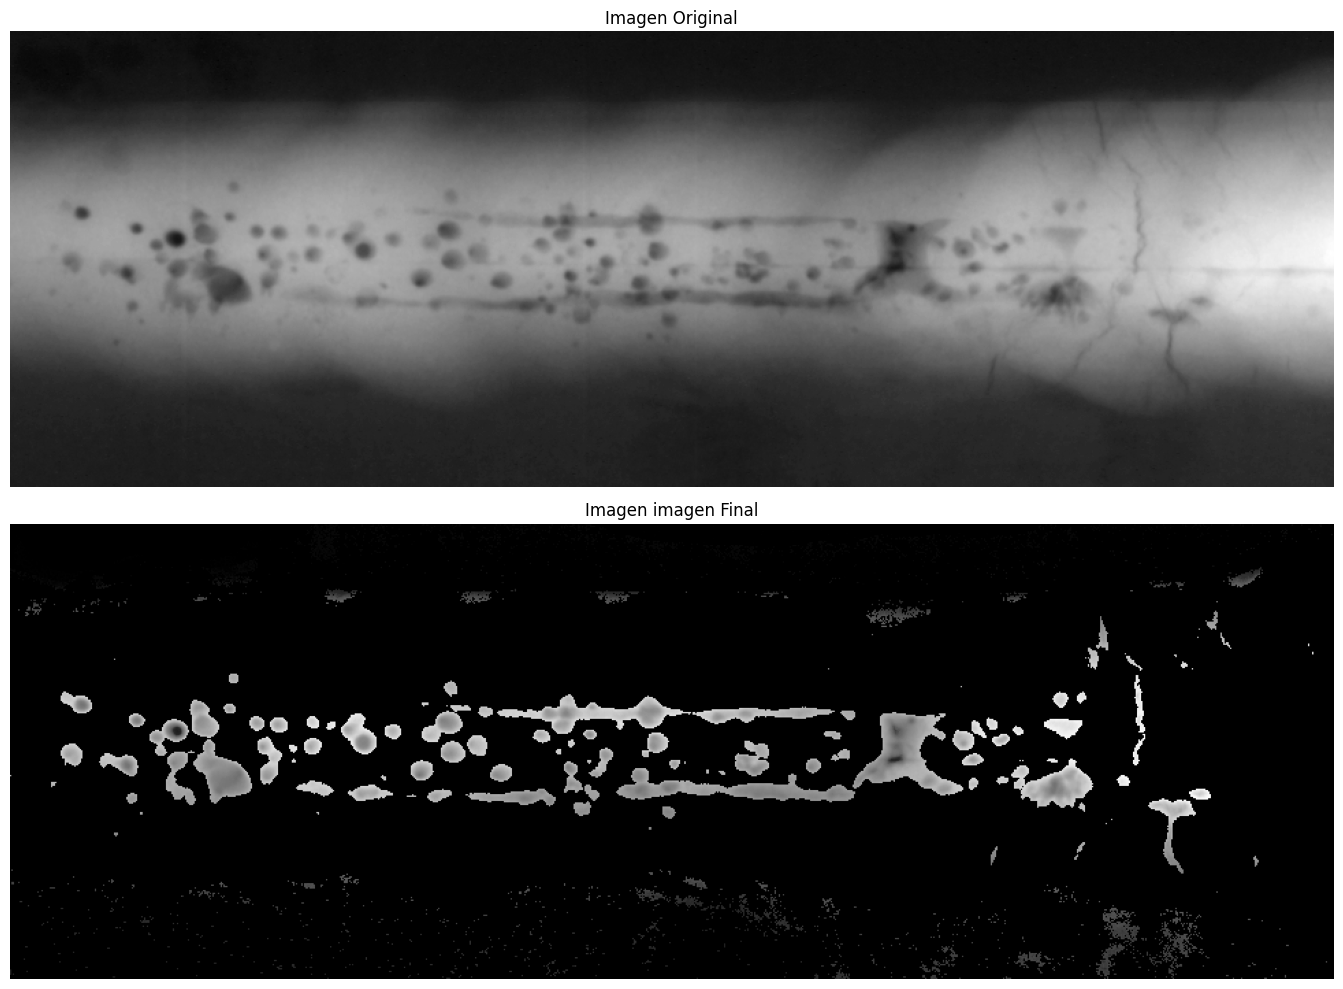

In [50]:
# Multiplicar punto a punto las imágenes
# https://stackoverflow.com/questions/44333605/what-does-bitwise-and-operator-exactly-do-in-opencv
imagen_final = cv2.bitwise_and(img_ecualizada, img_binarizada)

plt.figure(figsize=(15, 10))
# Mostrar la imagen original
plt.subplot(2, 1, 1)
plt.imshow(img, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Mostrar la imagen ecualizada
plt.subplot(2,1, 2)
plt.imshow(imagen_final, cmap='gray')
plt.title('Imagen imagen Final')
plt.axis('off')

# Mostrar el multiplot
plt.tight_layout()
plt.show()